In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from tqdm import tqdm_notebook as tqdm
from multiprocessing import cpu_count
from graspy.plot import pairplot
from graspy.inference import LatentDistributionTest

In [2]:
# load the embeddigns 
embeddings = [pd.read_csv(f"../data/Xhat-Khat8-dhat5-drosophila/Xhat{i+1}-dhat5-drosophila.csv") for i in range(8)]
embeddings = [i.values for i in embeddings]
print([len(i) for i in embeddings])

[184, 214, 228, 365, 232, 148, 138, 239]


In [3]:
# discard the zero rows of the embeddings 
for i in range(len(embeddings)):
    embedding = embeddings[i]
    embedding = embedding[~(embedding.sum(axis=1) == 0)]
    embeddings[i] = embedding
print([len(i) for i in embeddings])

[173, 193, 217, 363, 224, 114, 126, 198]


In [4]:
np.random.seed(314)

In [5]:
embedding_2 = embeddings[1]
embedding_5 = embeddings[4]
embedding_7 = embeddings[6]
iterations = 1000

In [6]:
# p_vals_corrected_2_5 = np.zeros(iterations)
# p_vals_uncorrected_2_5 = np.zeros(iterations)
# for i in tqdm(range(iterations)):
#     ldt_corrected = LatentDistributionTest(test='hsic',
#                                            metric='gaussian',
#                                            n_bootstraps=1000,
#                                            workers=cpu_count()-2,
#                                            size_correction=True,
#                                            input_graph=False)
#     ldt_corrected.fit(embedding_2, embedding_5)
#     p_vals_corrected_2_5[i] = ldt_corrected.p_value_
#     ldt_uncorrected = LatentDistributionTest(test='hsic',
#                                              metric='gaussian',
#                                              n_bootstraps=1000,
#                                              workers=cpu_count()-2,
#                                              size_correction=False,
#                                              input_graph=False)
#     ldt_uncorrected.fit(embedding_2, embedding_5)
#     p_vals_uncorrected_2_5[i] = ldt_uncorrected.p_value_
    
# p_vals_corrected_5_7 = np.zeros(iterations)
# p_vals_uncorrected_5_7 = np.zeros(iterations)
# for i in tqdm(range(iterations)):
#     ldt_corrected = LatentDistributionTest(test='hsic',
#                                            metric='gaussian',
#                                            n_bootstraps=1000,
#                                            workers=cpu_count()-2,
#                                            size_correction=True,
#                                            input_graph=False)
#     ldt_corrected.fit(embedding_5, embedding_7)
#     p_vals_corrected_5_7[i] = ldt_corrected.p_value_
#     ldt_uncorrected = LatentDistributionTest(test='hsic',
#                                              metric='gaussian',
#                                              n_bootstraps=1000,
#                                              workers=cpu_count()-2,
#                                              size_correction=False,
#                                              input_graph=False)
#     ldt_uncorrected.fit(embedding_5, embedding_7)
#     p_vals_uncorrected_5_7[i] = ldt_uncorrected.p_value_
    
# p_vals_corrected_2_7 = np.zeros(iterations)
# p_vals_uncorrected_2_7 = np.zeros(iterations)
# for i in tqdm(range(iterations)):
#     ldt_corrected = LatentDistributionTest(test='hsic',
#                                            metric='gaussian',
#                                            n_bootstraps=1000,
#                                            workers=cpu_count()-2,
#                                            size_correction=True,
#                                            input_graph=False)
#     ldt_corrected.fit(embedding_2, embedding_7)
#     p_vals_corrected_2_7[i] = ldt_corrected.p_value_
#     ldt_uncorrected = LatentDistributionTest(test='hsic',
#                                              metric='gaussian',
#                                              n_bootstraps=1000,
#                                              workers=cpu_count()-2,
#                                              size_correction=False,
#                                              input_graph=False)
#     ldt_uncorrected.fit(embedding_2, embedding_7)
#     p_vals_uncorrected_2_7[i] = ldt_uncorrected.p_value_

# pd.DataFrame(data=p_vals_corrected_2_5).to_csv('../data/real_data_p_vals_corrected_2_5.csv')
# pd.DataFrame(data=p_vals_corrected_2_7).to_csv('../data/real_data_p_vals_corrected_2_7.csv')
# pd.DataFrame(data=p_vals_corrected_5_7).to_csv('../data/real_data_p_vals_corrected_5_7.csv')
# pd.DataFrame(data=p_vals_uncorrected_2_5).to_csv('../data/real_data_p_vals_uncorrected_2_5.csv')
# pd.DataFrame(data=p_vals_uncorrected_2_7).to_csv('../data/real_data_p_vals_uncorrected_2_7.csv')
# pd.DataFrame(data=p_vals_uncorrected_5_7).to_csv('../data/real_data_p_vals_uncorrected_5_7.csv')

In [7]:
p_vals_corrected_2_5 = pd.read_csv('../data/real_data_p_vals_corrected_2_5.csv')
p_vals_corrected_2_7 = pd.read_csv('../data/real_data_p_vals_corrected_2_7.csv')
p_vals_corrected_5_7 = pd.read_csv('../data/real_data_p_vals_corrected_5_7.csv')
p_vals_uncorrected_2_5 = pd.read_csv('../data/real_data_p_vals_uncorrected_2_5.csv')
p_vals_uncorrected_2_7 = pd.read_csv('../data/real_data_p_vals_uncorrected_2_7.csv')
p_vals_uncorrected_5_7 = pd.read_csv('../data/real_data_p_vals_uncorrected_5_7.csv')

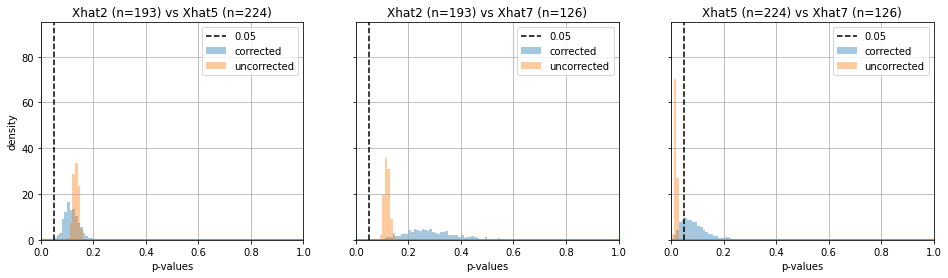

In [8]:
fig, (ax01, ax02, ax03) = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
sns.distplot(p_vals_corrected_2_5,
             label="corrected", ax=ax01,
             bins = np.linspace(0, 1, 101))
sns.distplot(p_vals_uncorrected_2_5,
             label="uncorrected", ax=ax01,
             bins = np.linspace(0, 1, 101))
sns.distplot(p_vals_corrected_5_7,
             label="corrected", ax=ax02,
             bins = np.linspace(0, 1, 101))
sns.distplot(p_vals_uncorrected_5_7,
             label="uncorrected", ax=ax02,
             bins = np.linspace(0, 1, 101))
sns.distplot(p_vals_corrected_2_7,
             label="corrected", ax=ax03,
             bins = np.linspace(0, 1, 101))
sns.distplot(p_vals_uncorrected_2_7,
             label="uncorrected", ax=ax03,
             bins = np.linspace(0, 1, 101))
ax01.plot([0.05, 0.05], [0, 95], 'k--', label='0.05')
ax02.plot([0.05, 0.05], [0, 95], 'k--', label='0.05')
ax03.plot([0.05, 0.05], [0, 95], 'k--', label='0.05')
ax01.set_xlim(0, 1)
ax02.set_xlim(0, 1)
ax03.set_xlim(0, 1)
ax03.set_ylim(0, 95)
ax01.set_xlabel("p-values")
ax02.set_xlabel("p-values")
ax03.set_xlabel("p-values")
ax01.set_ylabel("density")
ax01.set_title("Xhat2 (n=193) vs Xhat5 (n=224)")
ax02.set_title("Xhat2 (n=193) vs Xhat7 (n=126)")
ax03.set_title("Xhat5 (n=224) vs Xhat7 (n=126)")
ax01.legend()
ax02.legend()
ax03.legend()
ax01.grid()
ax02.grid()
ax03.grid()
fig.savefig("../figures/real_data_2_5_7.png", bbox_inches="tight")